# Computer Vision Masterclass - Face detection

## OpenCV

### Loading the image

In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/6 people sitting together.jpeg')

In [ ]:
image.shape

(183, 275, 3)

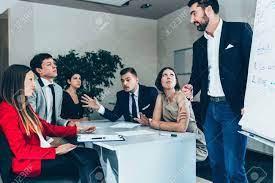

In [7]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
image = cv2.resize(image, (800,600))
image.shape

(600, 800, 3)

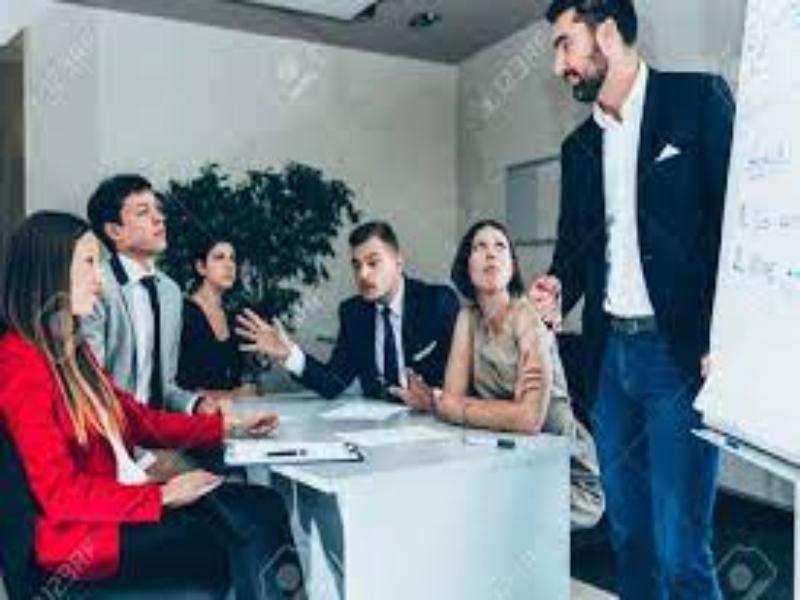

In [ ]:
cv2_imshow(image)

In [ ]:
600 * 800 * 3, 600 * 800, 1440000 - 480000

(1440000, 480000, 960000)

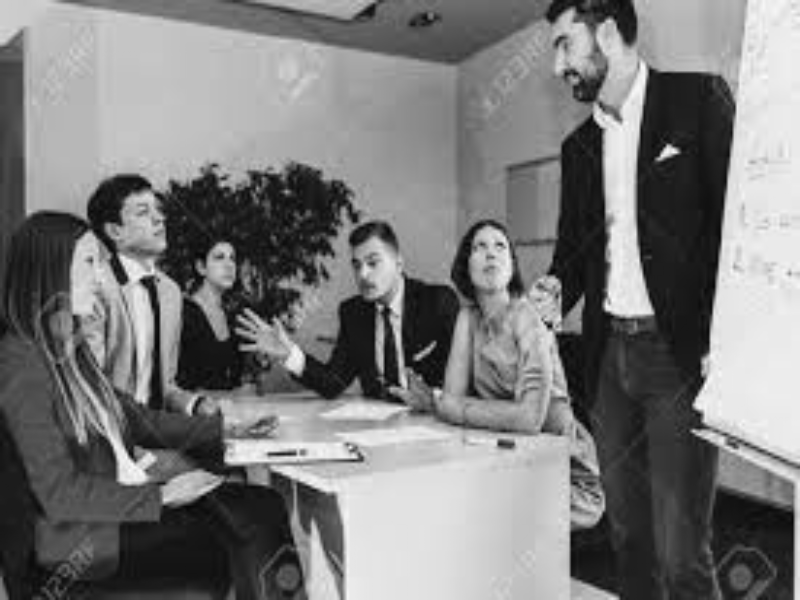

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [ ]:
image.shape

(600, 800, 3)

In [ ]:
image_gray.shape

(600, 800)

### Detecting faces

In [49]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')

In [50]:
detections = face_detector.detectMultiScale(image_gray)

In [ ]:
detections

array([[204, 242,  46,  46],
       [463, 225,  55,  55],
       [337, 242,  58,  58],
       [ 98, 254,  74,  74],
       [ 48, 310,  27,  27]], dtype=int32)

In [ ]:
len(detections)

5

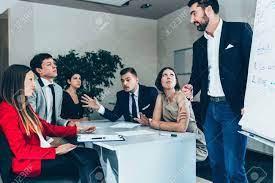

In [51]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 5)
cv2_imshow(image)

### Haarcascade parameters

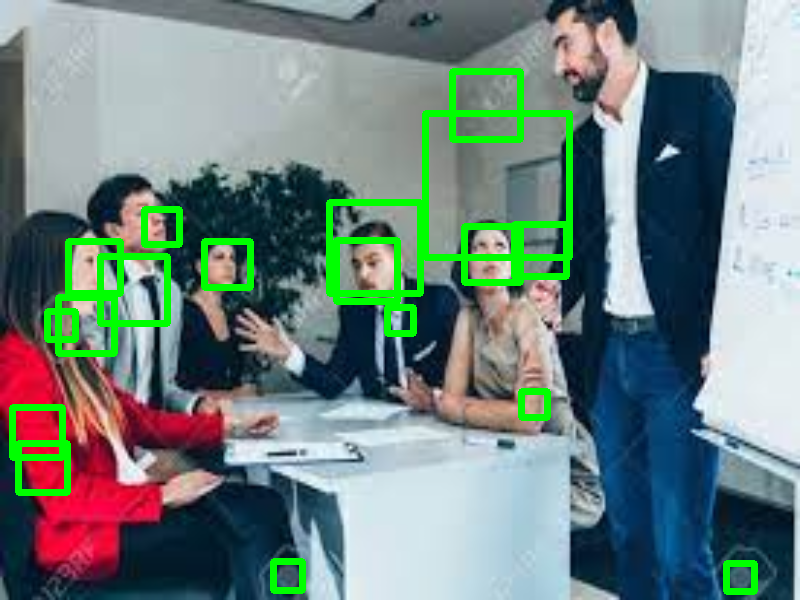

In [52]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/6 people sitting together.jpeg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.01)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 5)
cv2_imshow(image)

31 31
29 29
36 36
28 28
26 26
26 26
25 25
26 26


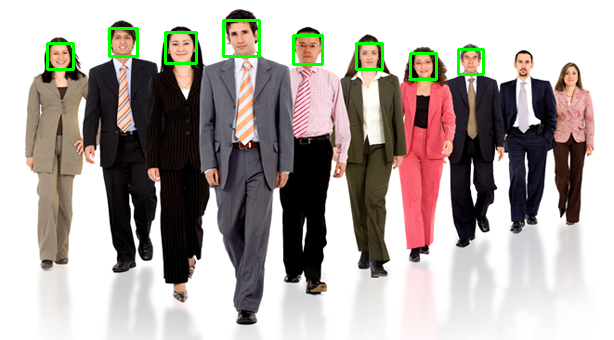

In [53]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/10 people standing together.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=2,
                                            minSize=(20,20), maxSize=(100,100))
for (x, y, w, h) in detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

### Eye detection

In [54]:
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/haarcascade_eye.xml')

(600, 800, 3)
24 24
36 36
26 26
21 21
22 22
48 48
24 24
26 26


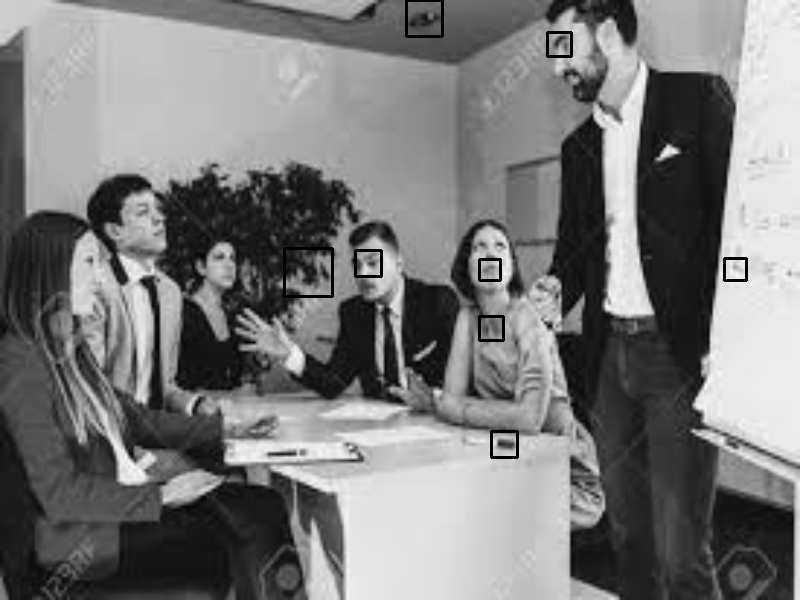

In [55]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/6 people sitting together.jpeg')
image = cv2.resize(image, (800, 600))
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (30,30))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image, scaleFactor = 1.1, minNeighbors=5, maxSize=(70,70))
for (x, y, w, h) in eye_detections:
  print(w, h)
  cv2.rectangle(image_gray, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(image_gray)

### Other objects

#### Cars

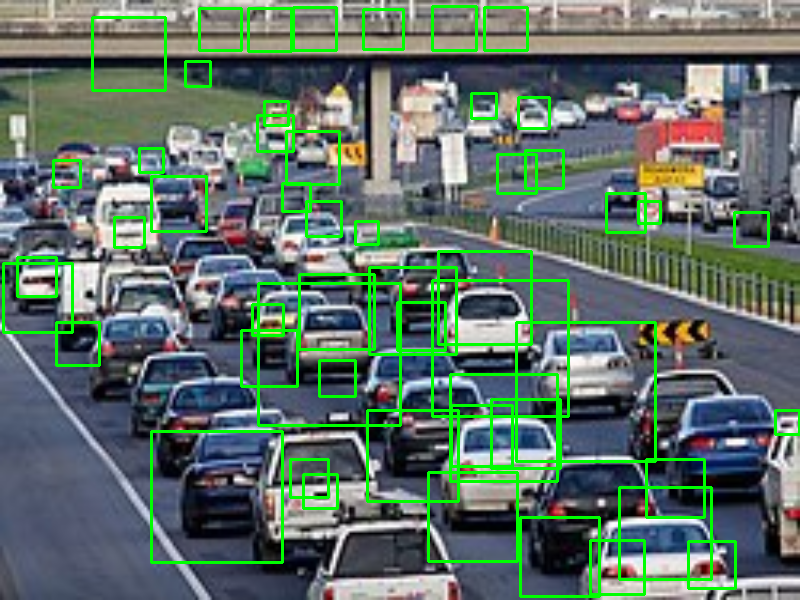

In [ ]:
car_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Computer Vision Masterclass/Cascades/cars.xml')
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/Traffic.jpg')
image = cv2.resize(image, (800, 600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.01, minNeighbors=10)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### Clocks

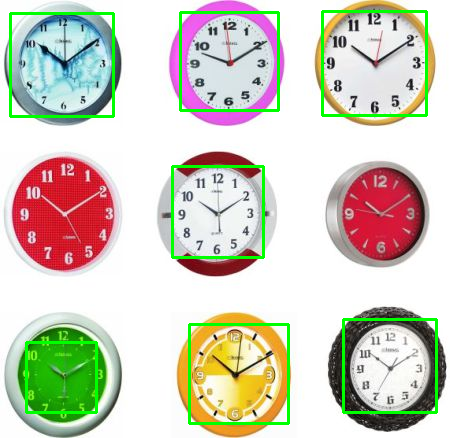

In [ ]:
clock_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Cascades/clocks.xml')
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/clock.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = clock_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=1)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### Full body

In [56]:
full_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Cascades/fullbody.xml')
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.05, minNeighbors=5,
                                              minSize = (50,50))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## Dlib

In [4]:
import dlib

### Detecting faces with HOG

> Indented block



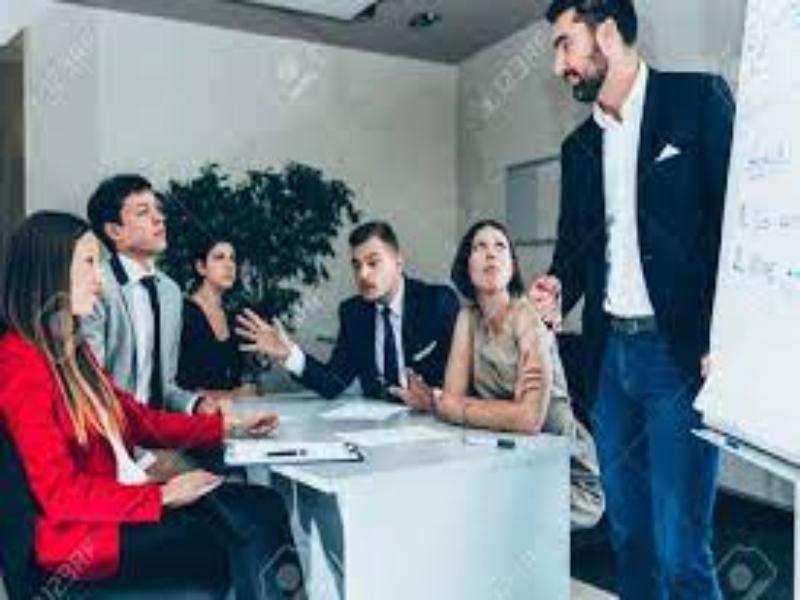

In [58]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/6 people sitting together.jpeg')
image = cv2.resize(image, (800, 600))
cv2_imshow(image)

In [59]:
face_detector_hog = dlib.get_frontal_face_detector()

In [65]:
detections = face_detector_hog(image, 1)

In [66]:
detections, len(detections)

(rectangles[], 0)

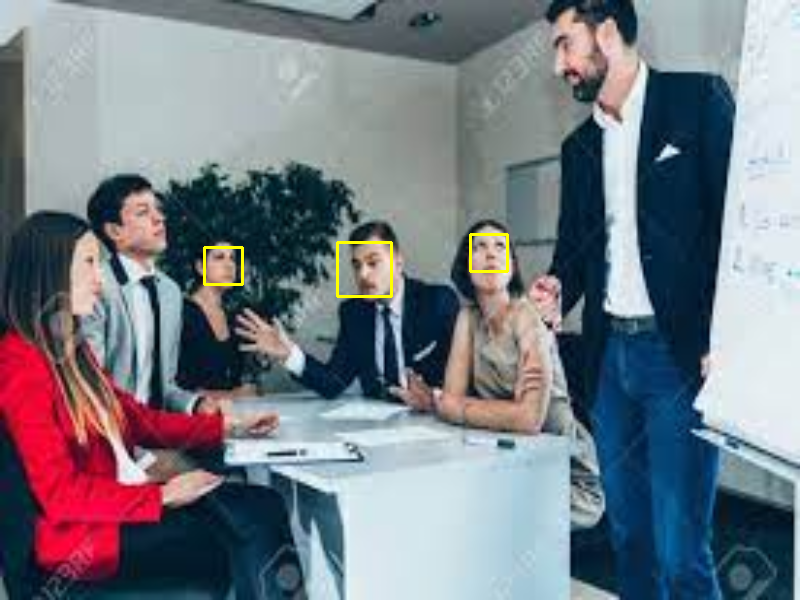

In [67]:
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

In [ ]:
import tensorflow as tf


### Detecting faces with CNN (Convolutional Neural Networks)

In [9]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/6 people sitting together.jpeg')
image = cv2.resize(image, (800, 600))
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Computer Vision Masterclass/Weights/mmod_human_face_detector.dat')

1.1153829097747803
1.0154932737350464
0.7674766778945923
0.08133888244628906


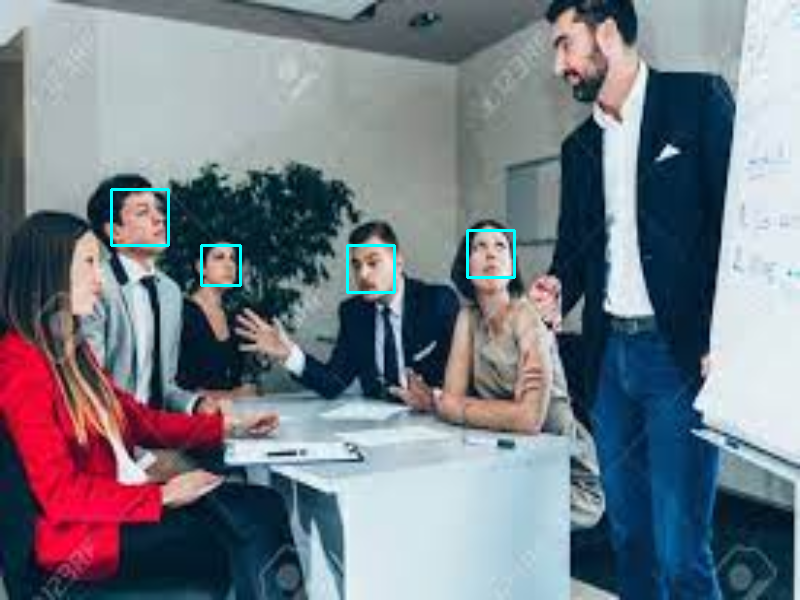

In [10]:
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)

### Haarcascade x HOG x CNN

#### Haarcascade

In [ ]:
image.shape

(294, 626, 3)

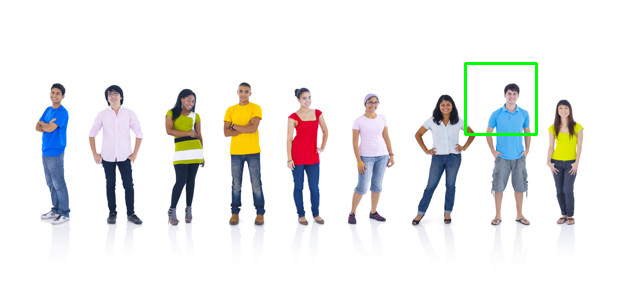

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
haarcascade_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Cascades/haarcascade_frontalface_default.xml')
detections = haarcascade_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors=5, minSize = (5,5))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### HOG

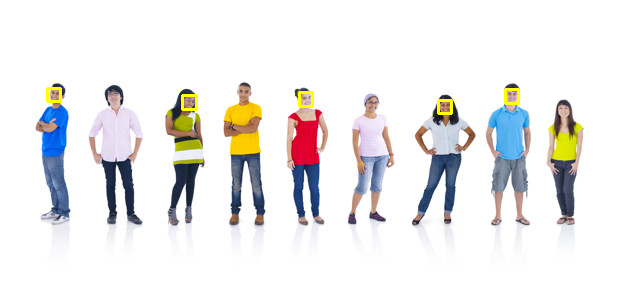

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/people3.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 4)
for face in detections:
    l, t, r, b = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

#### CNN

0.4463871121406555
0.08115974068641663


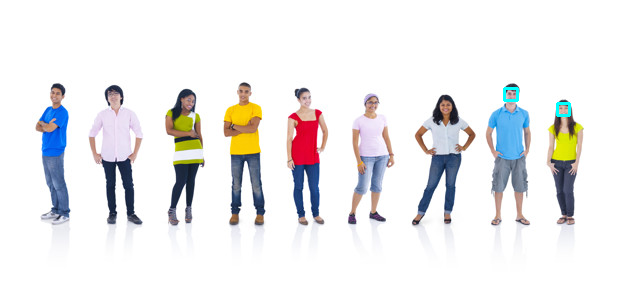

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Images/people3.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Weights/mmod_human_face_detector.dat')
detections = cnn_detector(image, 4)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)